In [2]:
import pandas as pd

# 读取新上传的两个文件
file_path_region_power = '地区发电.xlsx'
file_path_influencing_factors = '影响因素.xlsx'

# 使用 Pandas 读取文件
region_power_data = pd.read_excel(file_path_region_power)
influencing_factors_data = pd.read_excel(file_path_influencing_factors)

# 展示数据的前几行以了解其结构
region_power_data.head(), influencing_factors_data.head()


(    地区  1995  2000  2005  2010  2011  2012  2013  2014  2015  2016  2017  2018
 0  北 京   132   145   213   269   263   291   336   369   421   434   397   451
 1  天 津   134   211   369   589   621   590   624   626   623   618   638   725
 2  河 北   607   844  1339  1993  2327  2411  2507  2559  2498  2631  2983  3229
 3  山 西   506   620  1312  2151  2344  2546  2641  2679  2449  2535  2861  3203
 4  内蒙古   279   439  1057  2489  2973  3172  3567  3977  3929  3950  4413  4961,
   province  year  market      城镇化率  城镇恩格尔系数  农村恩格尔系数      人均实际gdp
 0       安徽  2005   6.385  0.355065   43.700  45.5231  5612.163531
 1       安徽  2006   7.065  0.371031   42.400  43.2000  5763.256267
 2       安徽  2007   7.421  0.387055   39.700  43.3000  6171.983254
 3       安徽  2008   7.294  0.405053   41.002  44.3000  6555.742539
 4       安徽  2009   7.476  0.420975   39.600  40.9000  6609.813161)

In [3]:
# 将地区发电数据集从宽格式转换为长格式
region_power_long = pd.melt(region_power_data, id_vars=['地区'], var_name='year', value_name='电力产量')

# 将年份列的数据类型统一为整数
region_power_long['year'] = region_power_long['year'].astype(int)
influencing_factors_data['year'] = influencing_factors_data['year'].astype(int)

# 标准化地区名称（假设地区名称与province名称对应）
# 这里简化处理，假定地区名的简称与province字段匹配，实际情况可能需要更精确的映射
region_power_long['地区'] = region_power_long['地区'].str.replace(' ', '')  # 去除地区名中的空格

# 合并两个数据集
merged_data = pd.merge(region_power_long, influencing_factors_data, left_on=['地区', 'year'], right_on=['province', 'year'], how='inner')

# 展示合并后的数据的前几行
merged_data.head()


,地区,year,电力产量,province,market,城镇化率,城镇恩格尔系数,农村恩格尔系数,人均实际gdp
0,北京,2005,213,北京,8.218,0.836151,31.8000,32.80,26703.550818
1,天津,2005,369,天津,8.047,0.750719,36.7016,38.60,17681.118049
2,河北,2005,1339,河北,6.450,0.376879,34.6000,41.02,8205.271685
3,山西,2005,1312,山西,4.941,0.421162,32.4280,44.23,7071.561493
4,内蒙古,2005,1057,内蒙古,5.595,0.471910,31.4296,45.14,7224.267061


In [4]:
# 保存合并后的数据集
merged_data.to_excel('merged_data.xlsx', index=False)

In [5]:
# 首先，我们需要对合并后的数据集进行一些基本的数据处理

# 检查缺失值
missing_values = merged_data.isnull().sum()

# 检查数据类型
data_types = merged_data.dtypes

missing_values, data_types


(地区          0
 year        0
 电力产量        0
 province    0
 market      0
 城镇化率        0
 城镇恩格尔系数     0
 农村恩格尔系数     0
 人均实际gdp     0
 dtype: int64,
 地区           object
 year          int32
 电力产量          int64
 province     object
 market      float64
 城镇化率        float64
 城镇恩格尔系数     float64
 农村恩格尔系数     float64
 人均实际gdp     float64
 dtype: object)

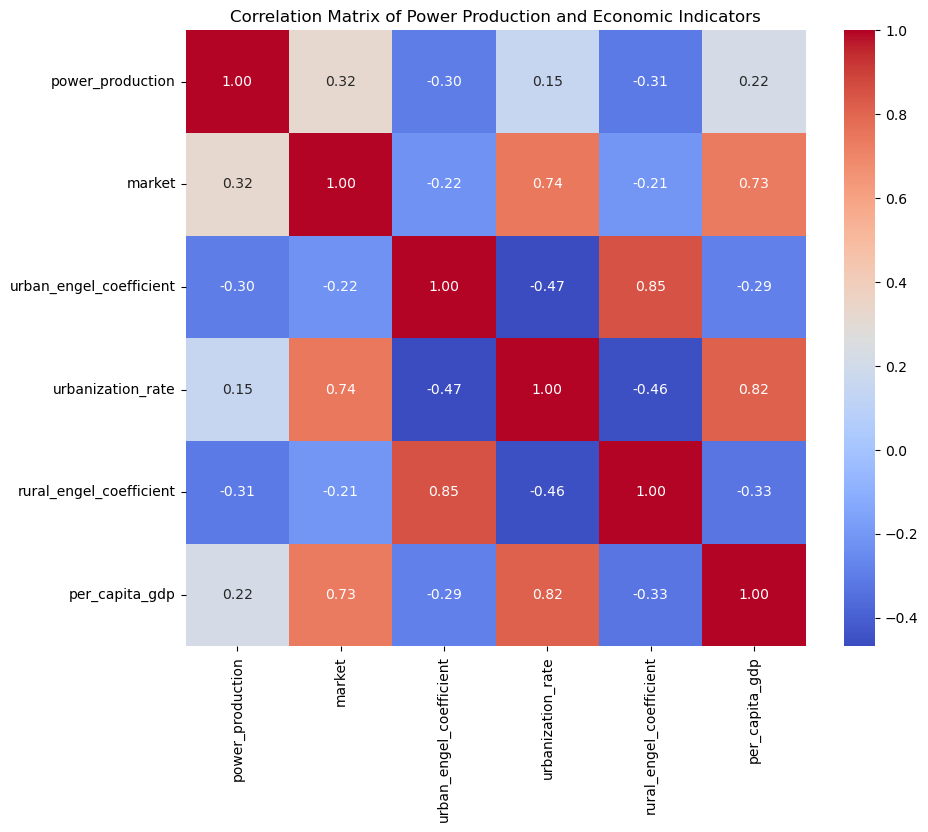

(              year         电力产量      market        城镇化率     城镇恩格尔系数  \
 count   310.000000   310.000000  310.000000  310.000000  310.000000   
 mean   2013.100000  1721.032258    7.399755    0.544976   33.248676   
 std       3.651439  1236.670812    2.182679    0.141612    5.422617   
 min    2005.000000    13.000000   -0.161000    0.207143   19.836515   
 25%    2011.000000   735.000000    5.938750    0.457977   28.818671   
 50%    2013.500000  1385.500000    7.612000    0.533628   32.994545   
 75%    2016.000000  2532.750000    8.926000    0.609827   36.700000   
 max    2018.000000  5920.000000   11.379000    0.937918   50.049700   
 
           农村恩格尔系数       人均实际gdp  
 count  310.000000    310.000000  
 mean    36.621994  10466.143783  
 std      7.251397   5197.339872  
 min     23.800000   3209.002980  
 25%     30.425000   7232.460584  
 50%     35.704800   8679.077048  
 75%     40.675000  12497.934376  
 max     60.300000  28522.294757  ,
                          power_pr

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 描述性统计分析
descriptive_stats = merged_data.describe()

columns_rename = {
    '电力产量': 'power_production',
    '城镇化率': 'urbanization_rate',
    '城镇恩格尔系数': 'urban_engel_coefficient',
    '农村恩格尔系数': 'rural_engel_coefficient',
    '人均实际gdp': 'per_capita_gdp'
}

merged_data.rename(columns=columns_rename, inplace=True)
# 计算相关系数矩阵和P值
correlation_matrix = merged_data[['power_production', 'market', 'urban_engel_coefficient',
                                  'urbanization_rate','rural_engel_coefficient',
                                  'per_capita_gdp']].corr(method='spearman')


# 绘制热图来可视化相关性
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Power Production and Economic Indicators")
plt.show()

descriptive_stats  , correlation_matrix

